# __Introduction__

This is an anlysis to determine the most predictive factors for average miles per gallon (MPG) of a car. We're going to be analyzing 205 observations with 25 independant variables each to try to predict the dependant variable, MPG.

Our data set is from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)

__Research Question:__

Which variable(s) most accurately predicts a car's miles per gallon?

## Variables

| Variable | Description | Data Type | Range |
| -------  | ----------- | --------- | ----- |
| symboling | safety risk as determined by inscurance actuaries | Categorical/Ordinal | -3 (safe) to 3 (risky) |
| normalize_losses | average loss of value per year | Numeric/Continuous | 65 to 256 |
| make | company that produces the car | Categorical/Nominal | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, <br> jaguar, mazda, mercedes-benz, mercury, mitsubishi, <br> nissan, peugot, plymouth, porsche, renault, saab, subaru, <br> toyota, volkswagen, volvo |
| fuel_type | type of fuel used by the car | Categorical/Nominal | gas, diesel |
| aspiration | type of aspiration in car | Categorical/Nominal | turbo, std |
|num_of_doors | how many doors the car has | Categorical/Nominal | four, two |
|body_style | style of the car's body | Categorical/Nominal | hardtop, wagon, sedan, hatchback, convertible |
| drive_wheels | number of wheels powered by the drivetrain | Categorical/Nominal | 4wd, fwd, rwd |
| engine_location | location of car's engine | Categorical/Nominal | front, rear |
| wheel_base | distance between front and rear wheels | Numeric/Continuous | 86.6 to 120.9 |
| length | length of the car | Numeric/Continuous | 141.1 to 208.1 |
| width | width of the car | Numeric/Continuous | 60.3 to 72.3 |
| height | height of the car | Numeric/Continuous | 47.8 to 59.8 |
| curb_weight | weight of the car when empty | Numeric/Continuous | 1,488 to 4,066 |
| engine_type | type of engine | Categorical/Nominal | dohc, dohcv, l, ohc, ohcf, ohcv, rotor |
| num_of_cylinders | number of cylinders in the car | Categorical/Nominal | eight, five, four, six, three, twelve, two |
| engine_size | size of the engine | Numeric/Continuous | 61 to 326 |
| fuel_system | type of fuel system in the car | Categorical/Nominal | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi |
| bore | size of the car's cylinder | Numeric/Continuous | 2.54 to 3.94 |
| stroke | distance travelled by piston in each cycle | Numeric/Continuous | 2.07 to 4.17 |
| compression_ratio | ratio of cylinder's maximum volume to its minimum value | Numeric/Continuous | 7 to 23 |
| horsepower | power of the car | Numeric/Continuous | 48 to 288 |
| peak_rpm | maximum rotations per minute | Numeric/Continuous | 4,150 to 6,600 |
| city_mpg | average miles per gallon of city driving | Numeric/Continuous | 13 to 49 |
| highway_mpg | average miles per gallon of highway driving | Numeric/Continuous | 16 to 54 |
| price | sticker price of the car | Numeric/Continuous | 5,118 to 45,400 |


## Importing Libraries

First, we're going to import all the libraries we're going to use over the course of this analysis.

In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# __1) Import Data__

The first step is going to be importing the data from a csv in Github, and properly labeling the columns

In [2]:
# import data into data frame
car_data = pd.read_csv("https://raw.githubusercontent.com/thesabermaniac/FeatureSelection/main/car-data.csv", header=None, 
                       names=['symboling', 'normalized_losses', 'make', 'fuel_type','aspiration','num_of_doors', 
                              'body_style','drive_wheels','engine_location','wheel_base','length','width',
                              'height','curb_weight','engine_type','num_of_cylinders','engine_size',
                              'fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm',
                              'city_mpg','highway_mpg','price'])

car_data_backup = car_data.copy()

# get snapshot of data
car_data.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# get shape of data set
car_data.shape

(205, 26)

# __2) Exploratory Data Analysis__

Next, we'll perform an exploratory data analysis, or EDA. This will allow us to get a better understanding of the data we're going to be working with.

## Get key metrics for numeric data

First, we're going to use `.describe()` to get the key metrics for each numeric attribute

In [4]:
car_data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Let's also check the data type for each column

In [5]:
car_data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

__Takeaways:__

- The first thing I notice is that there are several numeric columns (normalized_losses, bore, stroke, horsepower, peak_rpm, and price) that are stored as objects.
- It looks like the mins and maxes are all in line with the info that came with the dataset, indicating there likely weren't any severe data entry mistakes.

## Find missing data

First, we're going to take a look at our data to see if there's any missing data. 

We can already see from our snapshot above that there are a couple observations that include a '?'. Let's see how many '?' entries there are in our dataset.

In [6]:
# find all entries that have a question mark
question_marks = car_data.where(car_data=='?').count()

question_marks

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [7]:
q_pct = question_marks/car_data.count() * 100
q_pct.sort_values(inplace=True, ascending=False)
q_pct

normalized_losses    20.00000
price                 1.95122
stroke                1.95122
bore                  1.95122
peak_rpm              0.97561
horsepower            0.97561
num_of_doors          0.97561
length                0.00000
make                  0.00000
fuel_type             0.00000
aspiration            0.00000
body_style            0.00000
drive_wheels          0.00000
engine_location       0.00000
wheel_base            0.00000
height                0.00000
width                 0.00000
highway_mpg           0.00000
curb_weight           0.00000
engine_type           0.00000
num_of_cylinders      0.00000
engine_size           0.00000
fuel_system           0.00000
compression_ratio     0.00000
city_mpg              0.00000
symboling             0.00000
dtype: float64

__Takeaways:__

- It looks like most columns don't have any missing values and the few that do are pretty minimal. 
- The galring exception is normalized_losses which has 41 instances of '?' inputs. This makes up 20% of the data, so it's something that needs to be addressed.
- All the numeric columns that were stored as objects seem to have '?' entries. This is likely why they had to be stored as objects.

Now let's see if there are any null values in our data set on top of the '?' inputs

In [8]:
car_data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

It doesn't look like there are any nulls. Presumably, all the missing data was just input as a '?'. Let's convert all those '?' inputs to null values to make it easier to impute down the road.

In [9]:
car_data_with_nulls = car_data.replace('?', np.NaN)

car_data_with_nulls.where(car_data == '?').count()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
car_data_with_nulls.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Now we can covnert all the numeric columns to int or float data types.

In [11]:
# convert float data to float type
car_data_with_nulls[['bore', 'stroke']] = car_data_with_nulls[['bore', 'stroke']].astype('float')

# convert int data to int type
car_data_with_nulls[['normalized_losses', 'horsepower', 'peak_rpm', 'price']] = car_data_with_nulls[['normalized_losses', 'horsepower', 'peak_rpm', 'price']].astype('float')

# convert symboling to string type
car_data_with_nulls[['symboling']] = car_data_with_nulls[['symboling']].astype('str')

car_data_with_nulls.dtypes

symboling             object
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [12]:
car_data_with_nulls.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Now that our data is formatted properly, we can take a look at the distributions and correlations. Keeping in mind we're going to need to impute data into the missing values down the road

## Separate Data

Before we can look at the distributions for each of our numeric features, we're going to have to separate the numeric data from the categorical

In [13]:
categorical_data = car_data_with_nulls.loc[:,car_data_with_nulls.dtypes==np.object]
numeric_data = car_data_with_nulls.loc[:, car_data_with_nulls.dtypes!=np.object]

categorical_data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [14]:
numeric_data.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [15]:
numeric_data.shape

(205, 15)

In [16]:
categorical_data.shape

(205, 11)

## Get Distribution

Now we can look at the distribution for the numeric data

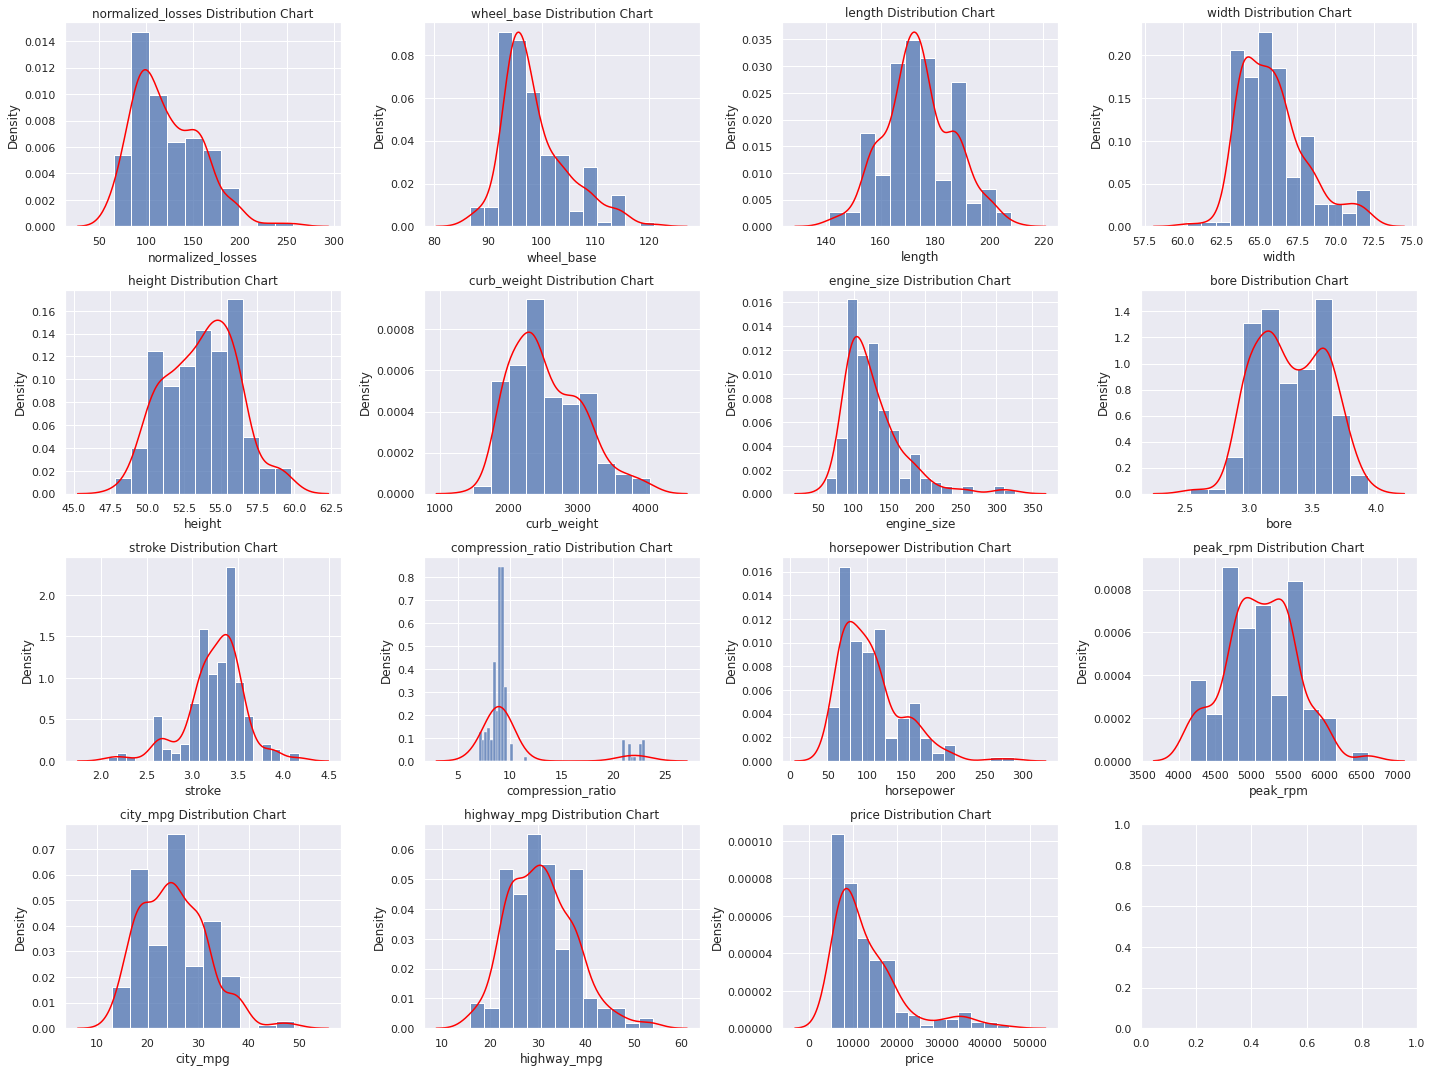

In [17]:
figure, axes = plt.subplots(4, 4, figsize=(20,15))

x = 0
y = 0
for column in numeric_data.columns:
  sns.histplot(numeric_data[column], ax=axes[x, y], stat='density')
  sns.kdeplot(numeric_data[column], ax=axes[x, y], color='red', alpha=0.5)
  axes[x, y].set_title(column + " Distribution Chart")
  x = x + 1 if y == 3 else x
  y = y + 1 if y != 3 else 0

# set spacing
figure.tight_layout()

plt.show()

__Takeaways:__

- Most variables have a relatively normal distribution
- Some attributes are slightly skewed, but it looks like most of those are due to outliers.
- It looks like compression_ratio has some serious outliers

## Outliers

Let's take a closer look at the outliers we detected in the distribution charts

### Compression Ratio

compression_ratio looks like it has the most severe outliers. Some basic research reveals that a [petrol engine](https://carbiketech.com/compression-ratio/#:~:text=Since%20Petrol%20is%20very%20volatile,mixture%20in%20the%20combustion%20chamber.) has a compression ratio ranging from 10:1 to 14:1 while a [diesel engine](https://www.britannica.com/technology/diesel-engine) ranges from 14:1 to 22:1.

Let's group the data by fuel type to get a better look at this

In [18]:
diesel = car_data_with_nulls[car_data_with_nulls['fuel_type']=='diesel'][['fuel_type', 'compression_ratio']]
petrol = car_data_with_nulls[car_data_with_nulls['fuel_type']=='gas'][['fuel_type', 'compression_ratio']]

diesel.shape

(20, 2)

In [19]:
petrol.shape

(185, 2)

It looks like we have 20 diesel observations and 185 petrols. This is consistent with what we see in the distribution chart, assuming the higher compression ratios all belong to diesel cars.

Let's look at the distributions of our separated dataframes to confirm this

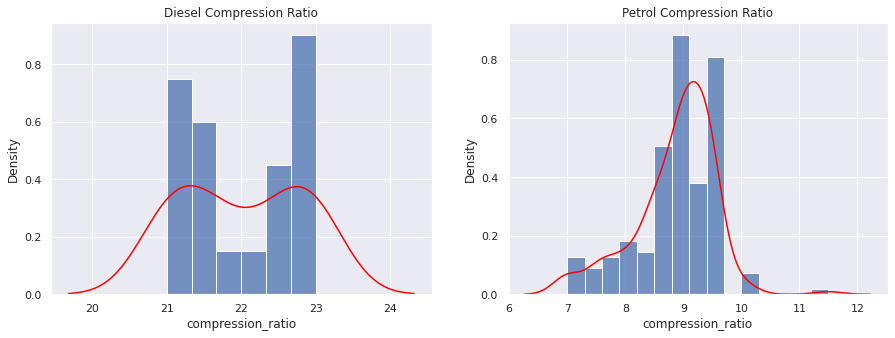

In [20]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(diesel['compression_ratio'], ax=axes[0], stat='density')
sns.kdeplot(diesel['compression_ratio'], ax=axes[0], color='red', alpha=0.5)
axes[0].set_title("Diesel Compression Ratio")

sns.histplot(petrol['compression_ratio'], ax=axes[1], stat='density')
sns.kdeplot(petrol['compression_ratio'], ax=axes[1], color='red', alpha=0.5)
axes[1].set_title("Petrol Compression Ratio")

plt.show()

This confirms our theory about the compression ratio outliers. The higher compression ratios all belong to diesel cars while the lower ones belong to petrol cars. Thus, we're not going to remove these observations

### Boxplots

Let's take a look at the boxplots for our other variables to see if we can identify any other outliers

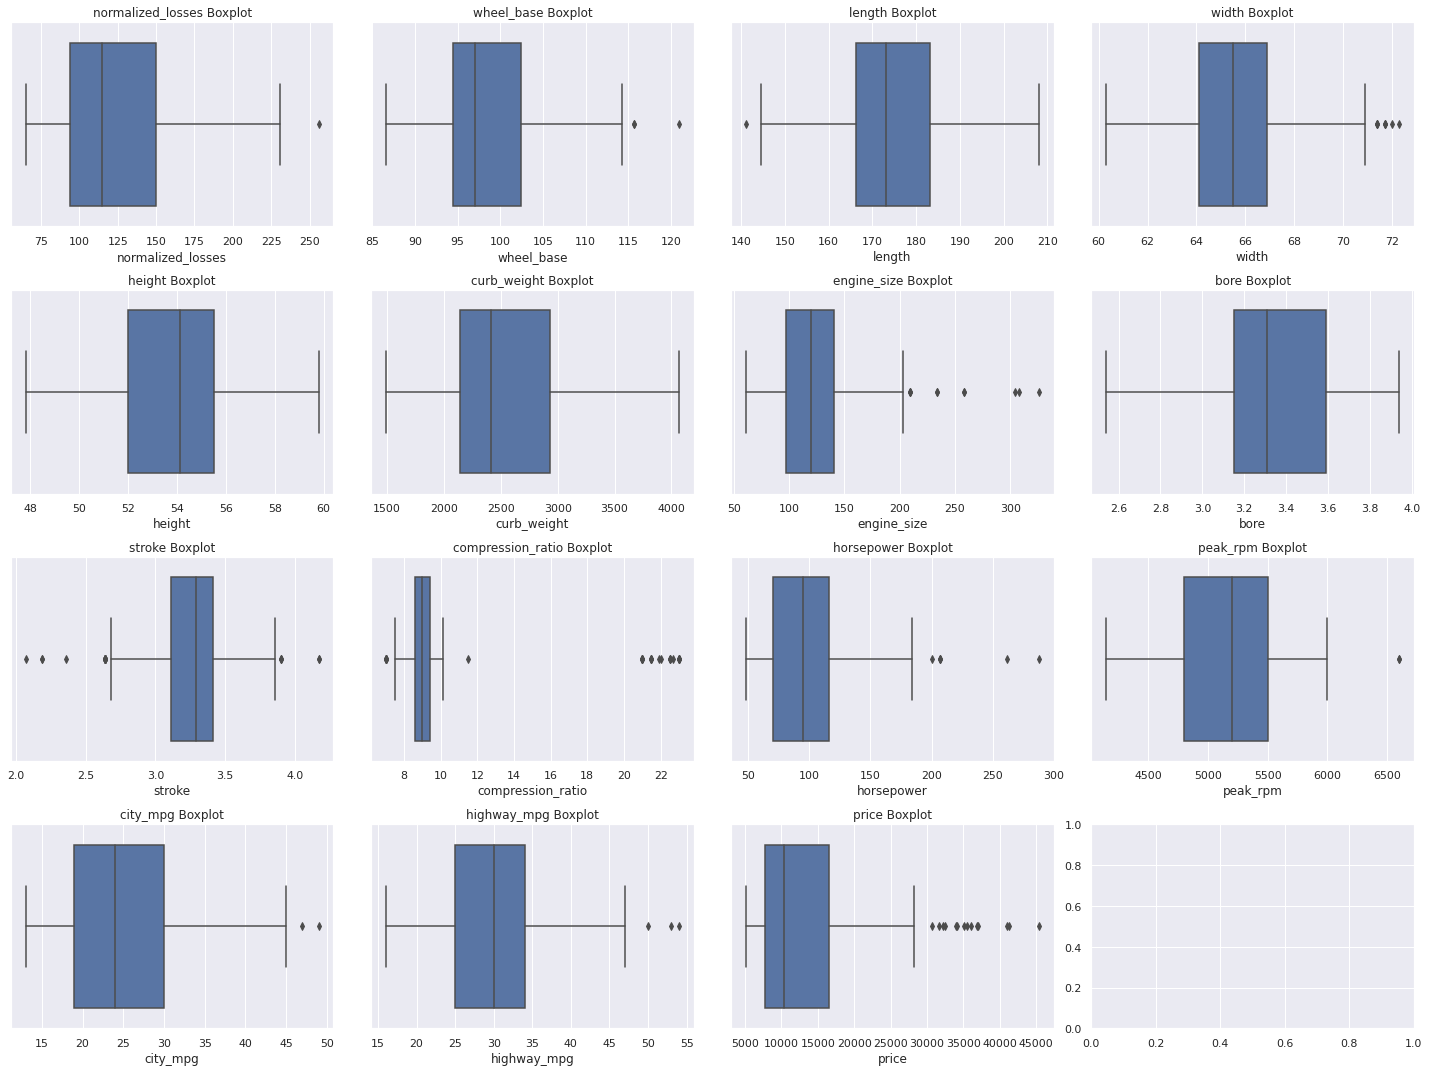

In [21]:
figure, axes = plt.subplots(4, 4, figsize=(20,15))

x = 0
y = 0
for column in numeric_data.columns:
  sns.boxplot(x=column, ax=axes[x, y], data=numeric_data)
  axes[x, y].set_title(column + " Boxplot")
  x = x + 1 if y == 3 else x
  y = y + 1 if y != 3 else 0

# set spacing
figure.tight_layout()

plt.show()

__Takeaways:__

- It looks like there are a few other features that have outliers, although none as extreme as compression_ratio.
- However, based on our research, it appears that all the outliers could very well be legitimate data. Let's take a look.


__Outliers:__

- Normalized Losses - It looks like normalized_losses has one outlier that's a little over 250. This is a perfectly feasible input as it just calculates the depreciation of the vehicle so there's no hard max.
- Wheel Base - It looks like wheel_base has 2 outliers, one at around 115 and one a little over 120. Based on our [research](https://www.pirate4x4.com/threads/wheel-base-chart-inside.457372/), there are a number of cars that exceed those numbers so we can assume that these are valid inputs.
- Length - There's one outlier in the length column just above 140 inches. According to [this](https://www.nadaguides.com/Cars/Shopping-Guides/how-long-is-the-average-car#:~:text=Regardless%2C%20each%20make%20of%20car,to%2018%2Dfeet%20in%20length.) source, standard cars and trucks range from 10 feet to 18 feet in length. This translates to 120 to 216 inches so the outlier is definitely feasible.
- Width - There are several observations that are wider than the outlier cutoff, ranging from ~71 - 73. According to [this](https://www.nationwidevehiclecontracts.co.uk/guides/ask-nvc/understanding-car-size-and-dimensions) source, the width of a standard car can range from 1475mm to 2008mm. This translates to 58 to 79 inches, so our olutliers are in line with the expected range.
- Engine Size - Our engine_size outliers range from ~200 - 350 cubic inches. This makes sense as our [research](https://www.motortrend.com/news/top-10-largest-engines-in-u-s-market-cars/) indicates that there are cars on the market that boast engines that are upwards of 6.5 - 8.4 litres, or 396 - 512 cubic inches. These are obviously the exception, but it indicates that our outliers are well within the acceptable range.
- Stroke - I couldn't find any data regarding an acceptable range for engine stroke, but since none of our our outliers are extremely far off from the rest of our data, I'm going to assume it's all accurate data.
- Horsepower - We have horsepower outliers ranging from ~200 - 300. [Autolist](https://www.autolist.com/guides/average-car-horsepower) suggests that standard trucks and SUVs can have upwards of 300-400 horsepower so it looks like our outliers are valid inputs.
- Peak RPM - There's only one outlier here at around 6,500 rpm. This looks like a valid input according to [this](https://www.whichcar.com.au/car-advice/what-is-rpm) source, which says that car engines typically have a max rpm of 6,000-7,000 rpm.
- City MPG - We have 2 outliers here, both in the range of 45 - 50 mpg. This is feasible according to [this](https://www.caranddriver.com/features/g19746506/every-nonhybrid-car-that-scored-40-mpg-and-higher-in-our-real-world-highway-fuel-economy-test/) article which lists the most fuel-efficient cars, ranging from 40 - 52 mpg.
- Highway MPG - There are 3 highway_mpg outliers, all ranging from 50 - 55 mpg. According to [True Car](https://www.truecar.com/best-cars-trucks/cars/mpg-over-40/), there are several 2021 cars that approach 55 mpg of highway driving, so we can assume these outliers are valid inputs.
- Price - There are several outliers here, but we're going to assume these are all valid due to the general variance in pricing of cars.

# __3) Data Preparation__

Now that we've confirmed that all our data is accurate and our nulls are set, we can start imputing data in place of our null values.

## Null Values

Let's start off by taking another look at our null values

In [22]:
missing_sums = pd.DataFrame(car_data_with_nulls.isnull().sum())
missing_sums['type'] = car_data_with_nulls.dtypes
missing_sums.columns = ['nulls', 'type']
missing_sums = missing_sums[missing_sums['nulls']>0]
missing_sums

,nulls,type
normalized_losses,41,float64
num_of_doors,2,object
bore,4,float64
stroke,4,float64
horsepower,2,float64
peak_rpm,2,float64
price,4,float64


As you can see, we have 7 columns with missing values, of which:

- One is categorical data (num_of_doors)
- The rest is numeric data
- 6 are very small percentages of the total data
- 1 (normalized_losses) represents a significant portion of the data

## Categorical

Let's start by taking a look at the categorical column with missing data, num_of_doors

In [23]:
num_doors_null = car_data_with_nulls[car_data_with_nulls['num_of_doors'].isnull()]
num_doors_null

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


These two observations have multiple columns that are the same. They both have:

- body_style = sedan
- drive_wheels = fwd
- engine_location = front
- engine_type = ohc
- num_of_cylinders = four

We're going to find all the columns in our dataset that also share these features and see how many doors they most often have

In [24]:
car_data_with_nulls.loc[(car_data_with_nulls['body_style'] == 'sedan') &
                        (car_data_with_nulls['drive_wheels'] == 'fwd') &
                        (car_data_with_nulls['engine_location'] == 'front') &
                        (car_data_with_nulls['engine_type'] == 'ohc') &
                        (car_data_with_nulls['num_of_cylinders'] == 'four')]['num_of_doors'].mode()

0    four
dtype: object

It looks like most cars that are similar to our observations have four doors so we're going to impute four in place of both our nulls

In [25]:
car_data_with_nulls['num_of_doors'] = car_data_with_nulls['num_of_doors'].fillna('four')

In [26]:
car_data_with_nulls.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

num_of_doors now has 0 null values

## Numeric

For the numeric data, we're going to compare multiple imputation methods to see which one most closely maintains our data's distribution

### KNNImputer

First, we'll try the K-Nearest Neighbor Imputer. This "guesses" what our null data should be replaced with based on the value of the _k_ most similar observations

First, we need to scale our data so we're comparing apples to apples

In [27]:
scaler = MinMaxScaler()
car_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
car_data_scaled.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,NaN,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,NaN,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


Now, we'll run our imputer on the scaled data

In [28]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

numeric_data_imputed = pd.DataFrame(imputer.fit_transform(car_data_scaled), columns=car_data_scaled.columns)


numeric_data_imputed.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

As you can see, we've now gotten rid of all our null values.

Now, we just need to reverse our scaler to get back to our unscaled data

In [29]:
numeric_data_imputed = pd.DataFrame(scaler.inverse_transform(numeric_data_imputed), columns=numeric_data_imputed.columns)

numeric_data_imputed.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,145.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,128.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,164.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Simple Imputer

Next, we'll use sklearn's SimpleImputer to impute the mean of every variable in place of the null values.

In [30]:
values = numeric_data.values

simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

numeric_data_simple_imputed = simple_imputer.fit_transform(values)

numeric_data_simple_imputed = pd.DataFrame(numeric_data_simple_imputed, columns=numeric_data.columns)

numeric_data_simple_imputed.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


Finally, we'll try replacing our nulls by backfilling our data. This method simply goes through the dataset and fills every null with the same value as the observation right before it in the data frame.

In [31]:
numeric_data_bfill = numeric_data.bfill()

numeric_data_bfill.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Compare Distributions

Now, let's compare all our distributions to determine which method worked the best

<function matplotlib.pyplot.show>

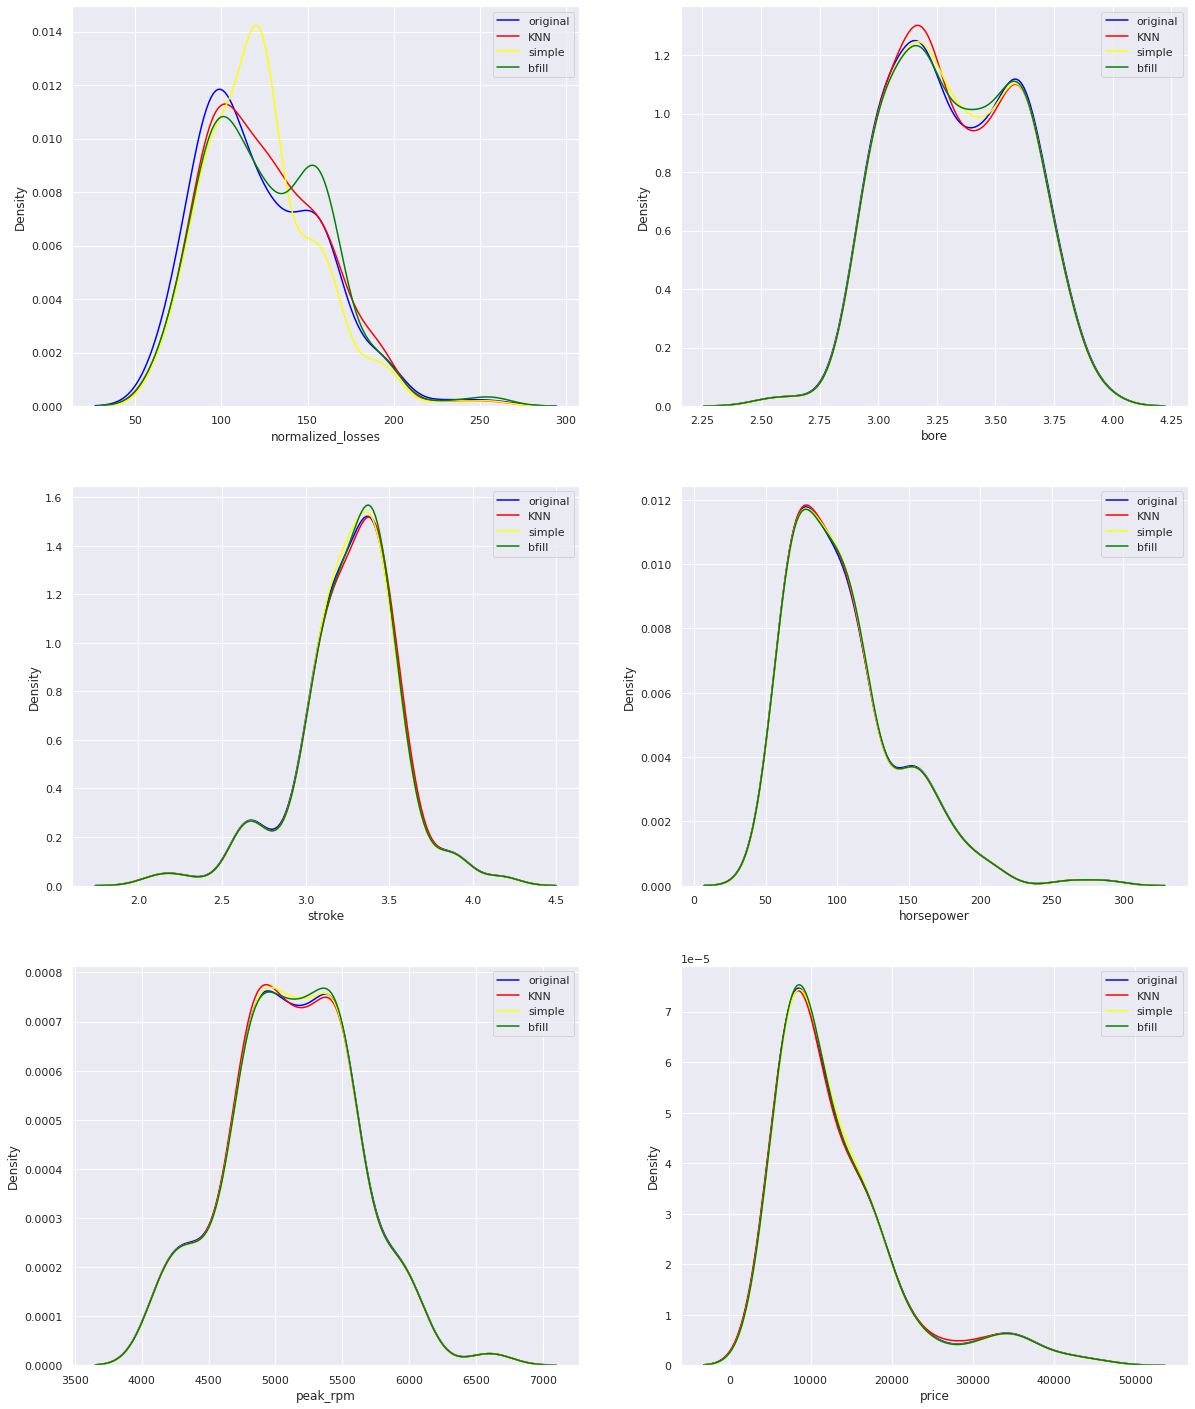

In [32]:
missing_columns = list(missing_sums.index)
missing_columns.remove('num_of_doors')

fig, axes = plt.subplots(3, 2, figsize=(20,25))

x = 0
y = 0
for column in missing_columns:
  sns.kdeplot(numeric_data[column], ax=axes[x, y], color='blue', label='original')
  sns.kdeplot(numeric_data_imputed[column], ax=axes[x, y], color='red', label='KNN')
  sns.kdeplot(numeric_data_simple_imputed[column], ax=axes[x, y], color='yellow', label='simple')
  sns.kdeplot(numeric_data_bfill[column], ax=axes[x, y], color='green', label='bfill')
  axes[x,y].legend()
  x = x + 1 if y == 1 else x
  y = y + 1 if y == 0 else 0
  
plt.show

__Takeaways:__

- normalized_losses has the largest discrepency between distributions. This makes sense as it had significantly more null values to fill than the other columns
- SimpleImputer is the farthest away from our original distribution
- KNNImputer is closest to our original distribution

Therefore, we're going to use the data we got from our KNN imputation

### Combining Data Frames

Now that we've replaced our numeric and categorical nulls, let's combine the 2 data sets

In [33]:
car_data_imputed = car_data_with_nulls.copy()

# car_data_imputed.drop(columns=missing_columns, axis='columns', inplace=True)

car_data_imputed[missing_columns] = numeric_data_imputed[missing_columns]

car_data_imputed.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,145.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,128.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [34]:
car_data_imputed.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# __4) Correlation__

Next, let's look at the correlation of our variables. This will tell us two things.

1. Which features most closely correlate to the response variable, and are therefore more likely to contribute to our final model?
2. Which features are closely collinear, i.e. they have a strong correlation with each other? This will allow us to potentially combine or remove redundant features.

## Categorical

Let's first look at the relationship between our categorical variables and our dependant variable

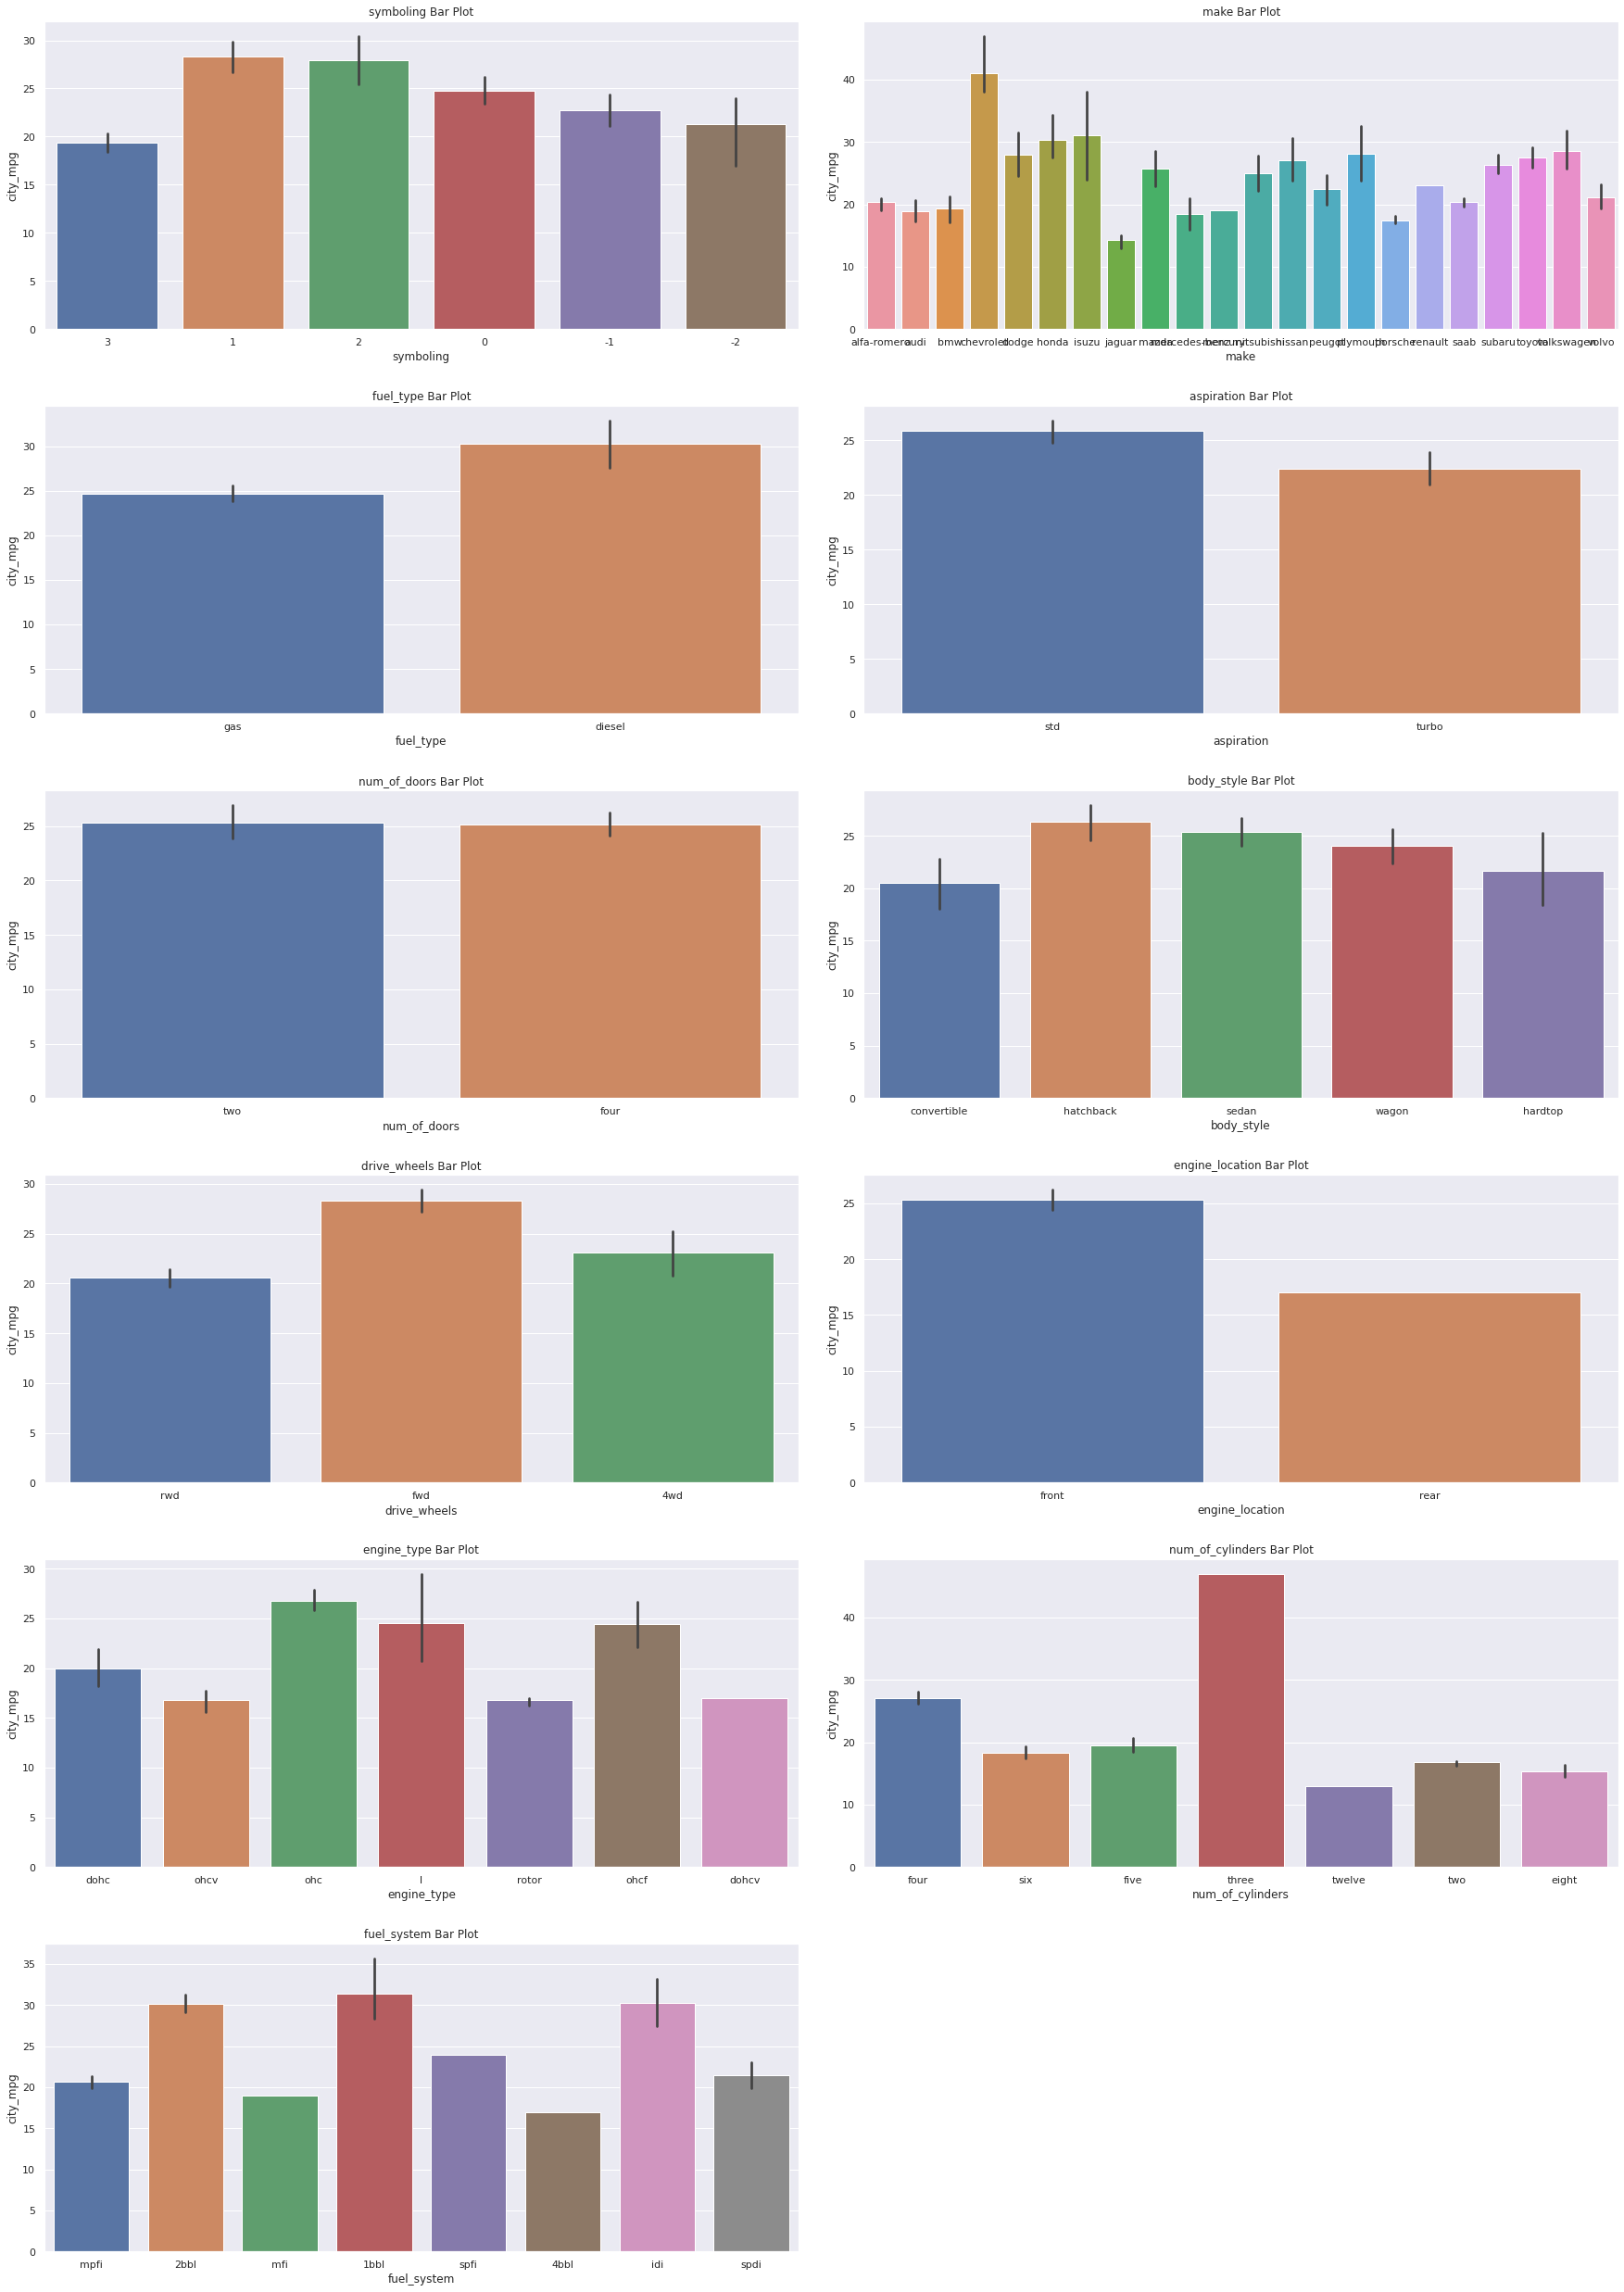

In [35]:
categorical_columns = categorical_data.columns

fig, axes = plt.subplots(6, 2, figsize=(25,35))

x_axis = 0
y_axis = 0
for column in categorical_columns:
  sns.barplot(ax=axes[x_axis,y_axis], x=column, y='city_mpg', data=car_data_imputed)
  axes[x_axis, y_axis].set_title(column + " Bar Plot")
  x_axis = x_axis + 1 if y_axis == 1 else x_axis
  y_axis = y_axis + 1 if y_axis == 0 else 0
  
axes[5,1].set_axis_off()

fig.tight_layout(pad=3)

plt.show()

__Takeaways:__

- Most of the categorical variables don't have a strong correlation to our dependant variable.
- Cheverolet cars in our data set tend to have significantly higher mpg than cars from other makers.
- Aspiration, Fuel Type, and drive wheels look to have solid correlation to mpg, as std, diesel cars with fwd can be expected to have slightly higher mpg than other variations.
- It looks like engine location and number of cylinders have the strongest correlations to mpg. 3 cylinder cars tend to have significantly higher mpg than any other variation while cars with an engine in the front tend to perform better than those with an engine in the rear.
- Symboling, body style, engine type, and fuel system don't have any single variable that stands out, but they all have 2-3 that stand above the rest.
  - Cars with a symboling of 1 or 2 tend to have higher mpg than the others.
  - Sedans and hatchbacks appear to perform better than other body types.
  - Ohc, l, and ohcf engine types can be expected to outperform other engine types.
  - 2bbl, 1bbl, and idi fuel systems tend to get higher mpg than the other fuel systems

## Numeric

Now let's look at the relationship between our dependant variable and numeric variables.

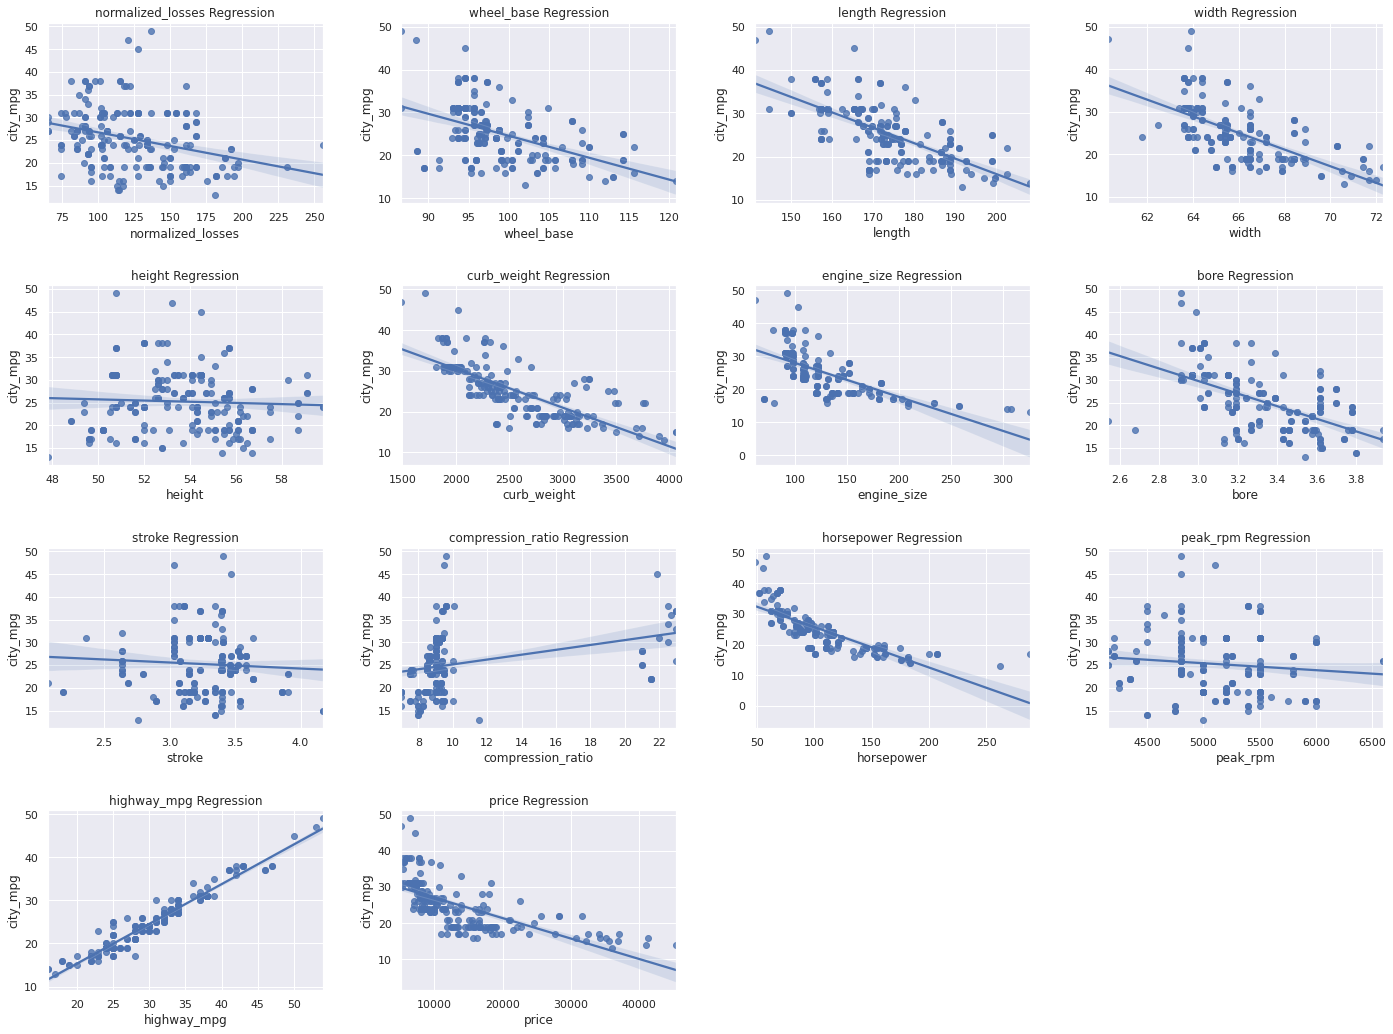

In [36]:
numeric_columns = numeric_data_imputed.columns
numeric_columns = numeric_columns.drop('city_mpg')

fig, axes = plt.subplots(4, 4, figsize=(20,15))

x_axis = 0
y_axis = 0
for column in numeric_columns:
  sns.regplot(ax=axes[x_axis,y_axis], x=column, y='city_mpg', data=car_data_imputed)
  axes[x_axis, y_axis].set_title(column + " Regression")
  x_axis = x_axis + 1 if y_axis == 3 else x_axis
  y_axis = y_axis + 1 if y_axis != 3 else 0
  
axes[3,2].set_axis_off()
axes[3,3].set_axis_off()

fig.tight_layout(pad=3)

plt.show()

__Takeaways:__

- wheel_base, length, width, curb_weight, engine_size, bore, horsepower, and price all have strong negative correlation with city_mpg. This means that as the variable increases, city_mpg decreases and vice versa.
- normalized_losses, height, stroke, and peak_rpm all have weaker negative correlations with city_mpg. This means that they have less affect on the city_mpg than the above variables. Thus, they're less likely than the above features to accurately predict city_mpg.
- highway_mpg has a very strong positive correlation with city_mpg. This means that as highway_mpg increases so does city_mpg. This makes sense based on basic knowledge of the topic as these are both directly dealing with the fuel efficiency of the car, just in different conditions.
- compression_ratio has a much weaker positive correaltion with city_mpg, meaning it has less of an effect on city_mpg than highway_mpg.

## Correlation Matrix

Let's get a correlation matrix so we can see the numeric value of our correlations as well as collinearity of our explanatory variables.

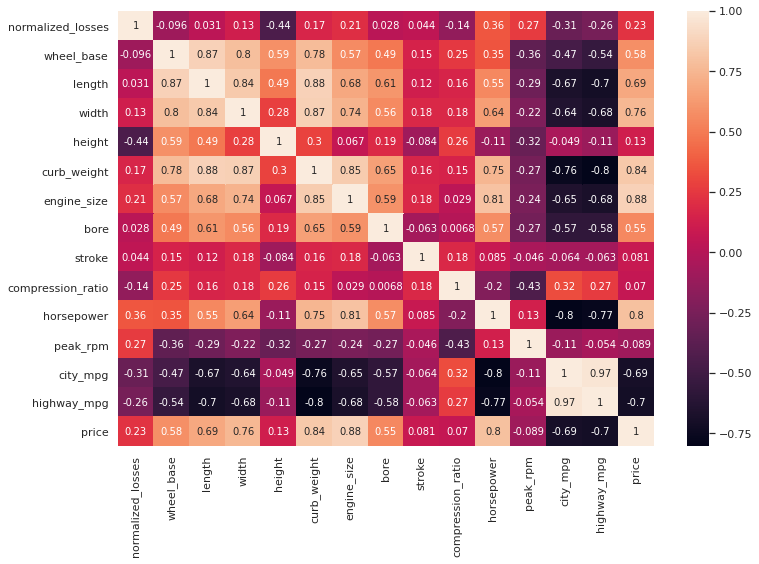

In [37]:
corr_matrix = car_data_imputed.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

__Takeaways:__

- highway_mpg has, by far, the strongest correlation to city_mpg at 0.97
- horsepower (-0.8), curb_weight (-0.76), price(-0.69), and length(-0.67) also are strong correlatory factors to our dependant variable.
- Notable collinearity: 
  - wheel_base & length: 0.87
  - wheel_base & width: 0.80
  - length & width: 0.84
  - length & width: 0.88
  - length & highway_mpg: -0.70
  - width & curb_weight: 0.87
  - curb_weight & engine_size: 0.85
  - curb_weight & highway_mpg: -0.80
  - curb_weight & price: 0.84
  - engine_size & horsepower: 0.81
  - engine_size & price: 0.88
  - horsepower & highway_mpg: -0.77
  - horsepower & price: 0.80
  - highway_mpg & price: -0.70

# 5) Feature Engineering and Selection

Now, we'll apply what we learned from our EDA and start building a model. We'll start by choosing the features we want to be represented in our model.

## Dummy Variables

Our first step is to create a numeric representation of our categorical data. This is done by creating "dummy variables". This creates a new column for each category and labels each observation with a 1 if it fits that category and a 0 if it doesn't.

Example: We have a categorical variable called "fuel_type" that has 2 categories, "gas" and "diesel." If we turn "fuel_type" into a dummy variable, it will create 2 new columns, "fuel_type_gas" and "fuel_type_diesel" and fill them in with 1s and 0s based on the car's fuel type.

In [38]:
car_data_with_dummies = pd.get_dummies(car_data_imputed, prefix_sep="_", columns=categorical_columns, drop_first=True)

car_data_with_dummies.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,145.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,128.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,164.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
car_data_with_dummies.shape

(205, 70)

In [40]:
car_data_with_dummies.dtypes

normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
                      ...   
fuel_system_idi        uint8
fuel_system_mfi        uint8
fuel_system_mpfi       uint8
fuel_system_spdi       uint8
fuel_system_spfi       uint8
Length: 70, dtype: object

We now have 70 columns, including the dummy columns, but they are all of type float or int, making them all usable in a regression model

Now, let's take another look at our potential collinear variables

In [41]:
# make correaltion matrix with new data frame (including dummy varaibles)
corr_matrix2 = car_data_with_dummies.corr()

corr_matrix2 = corr_matrix2.stack()

corr_matrix2[(corr_matrix2 != 1.0) & (abs(corr_matrix2) > 0.8)]

wheel_base            length                  0.874587
length                wheel_base              0.874587
                      width                   0.841118
                      curb_weight             0.877728
width                 length                  0.841118
                      curb_weight             0.867032
curb_weight           length                  0.877728
                      width                   0.867032
                      engine_size             0.850594
                      price                   0.837551
engine_size           curb_weight             0.850594
                      horsepower              0.809894
                      price                   0.875288
compression_ratio     fuel_type_gas          -0.984356
                      fuel_system_idi         0.984356
horsepower            engine_size             0.809894
                      city_mpg               -0.801818
                      price                   0.800848
city_mpg  

If we define collinear as any two variables with a correlation over 0.8 or below -0.8, we get quite a few variables that show high levels of collinearity.

## Split data

Next, we have to split our data into training and testing sets. This allows us to build a model on our training data and confirm its accuracy with our testing data

In [42]:
x = car_data_with_dummies.drop(['city_mpg'], axis=1)
y = car_data_with_dummies[['city_mpg']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

x_train.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
204,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,25,22625.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
137,104.0,99.1,186.6,66.5,56.1,2847,121,3.54,3.07,9.0,160.0,5500.0,26,18620.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45,115.4,94.5,155.9,63.6,52.0,1909,90,3.03,3.11,9.6,70.0,5400.0,43,5880.6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
187,94.0,97.3,171.7,65.5,55.7,2319,97,3.01,3.40,23.0,68.0,4500.0,42,9495.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
33,101.0,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,9.2,76.0,6000.0,34,6529.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Scale Data

Next, we're going to scale the numeric data using sklearn's `StandardScaler`. This is a scaling technique that places the mean of each column at 0 with a standard deviation of 1. 

It's important to scale the data when preparing a model becuase we need to make sure we're comparing apples to apples

### Scale training data

In [43]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

numeric_columns_list = list(numeric_columns)

x_train[numeric_columns_list] = x_train[numeric_columns_list].astype('float64')
x_train[numeric_columns_list] = [scaler.fit_transform(x_train[col].values.reshape(-1,1)) for col in numeric_columns_list]

x_train.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
204,-0.873819,1.594969,1.163497,1.379929,0.683298,0.878505,0.276383,1.620368,-0.367551,-0.198291,0.223394,0.632367,-0.783488,1.108310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
137,-0.604762,0.006775,0.987729,0.254741,0.924165,0.483783,-0.175048,0.751011,-0.632603,-0.317523,1.395233,0.846906,-0.643264,0.621704,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45,-0.263956,-0.723795,-1.465029,-1.104861,-0.721758,-1.238306,-0.874767,-1.096373,-0.500077,-0.174445,-0.897495,0.632367,1.740539,-0.926129,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
187,-0.903714,-0.279100,-0.202697,-0.214087,0.763587,-0.485580,-0.716766,-1.168819,0.460736,3.020958,-0.948445,-1.298490,1.600315,-0.486980,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
33,-0.694447,-0.850850,-1.936406,-0.917330,-0.480891,-1.181393,-0.829624,-1.531051,0.493867,-0.269830,-0.744647,1.919604,0.478526,-0.847348,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Scale testing data

In [44]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

numeric_columns_list = list(numeric_columns)

x_test[numeric_columns_list] = x_test[numeric_columns_list].astype('float64')
x_test[numeric_columns_list] = [scaler.fit_transform(x_test[col].values.reshape(-1,1)) for col in numeric_columns_list]

x_test.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
32,-0.690602,-0.836810,-2.001580,-0.834270,-0.415714,-1.456217,-1.285546,-1.573258,-0.554263,0.118188,-1.048000,0.677784,1.751293,-0.993117,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0.905179,1.483985,1.617449,2.604751,0.931676,0.785448,0.393360,-0.486006,0.404822,-0.362510,0.208886,0.677784,-0.987376,0.711816,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
135,-0.606613,0.198916,1.100445,0.327561,1.105533,0.594005,-0.048457,0.873058,-0.554263,-0.122161,0.208886,0.175602,-0.504081,0.407141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
124,0.294863,-0.414848,-0.035269,0.234615,-1.458854,0.727570,0.982450,1.067210,1.741730,-0.813164,1.088707,-0.326580,-1.148474,0.026852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11,1.857048,0.601699,0.269848,-0.462484,0.323177,-0.214063,-0.431366,0.717736,-1.338970,-0.272379,-0.017353,1.280402,-0.342983,0.603103,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


## Correlation Coefficients

Now, we're going to try to find the multicollinearity in our data by calculating the correlation coefficients between the variables.

This allows us to eliminate variables that are redundant and protect against overfitting.

We're going to set our cutoff at 0.8 - anything with a correlation over 0.8 or belowe -0.8 will be considered multicollinear

In [45]:
corr_result = x_train.corr()
corr_result = corr_result.stack()

corr_result[(corr_result != 1.0)&(abs(corr_result) > 0.8)]

wheel_base            length                  0.878198
                      width                   0.815533
length                wheel_base              0.878198
                      width                   0.866089
                      curb_weight             0.883053
width                 wheel_base              0.815533
                      length                  0.866089
                      curb_weight             0.900498
                      price                   0.804810
curb_weight           length                  0.883053
                      width                   0.900498
                      engine_size             0.849454
                      highway_mpg            -0.808283
                      price                   0.840975
engine_size           curb_weight             0.849454
                      horsepower              0.817638
                      price                   0.890329
compression_ratio     fuel_type_gas          -0.984981
          

__Takeaways:__

- We see quite a few variables that have multicollinearity as we defined (> 0.8 or < -0.8)
- We'll refer to this chart later to determine what variables to include in our model.

## Recursive Feature Elimination

Next, we'll use recursive feature elimination (RFE) to determine which features have weak predictive abilities for city_mpg, and remove them.

This is accomplished by fitting a model on the entire dataset, getting the score, and removing the weakest feature, then re-fitting the model with the new vairables and repeating the process until a desired number of features are used.

We're going to use cross validation to find the ideal number of features to use

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

cv_estimator = RandomForestClassifier(random_state=42)
cv_estimator.fit(x_train, y_train)
cv_selector = RFECV(cv_estimator, cv=10, step=1)
cv_selector = cv_selector.fit(x_train, y_train)
rfecv_mask = cv_selector.get_support()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Optimal number of features : 11
Best features : ['length', 'width', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']


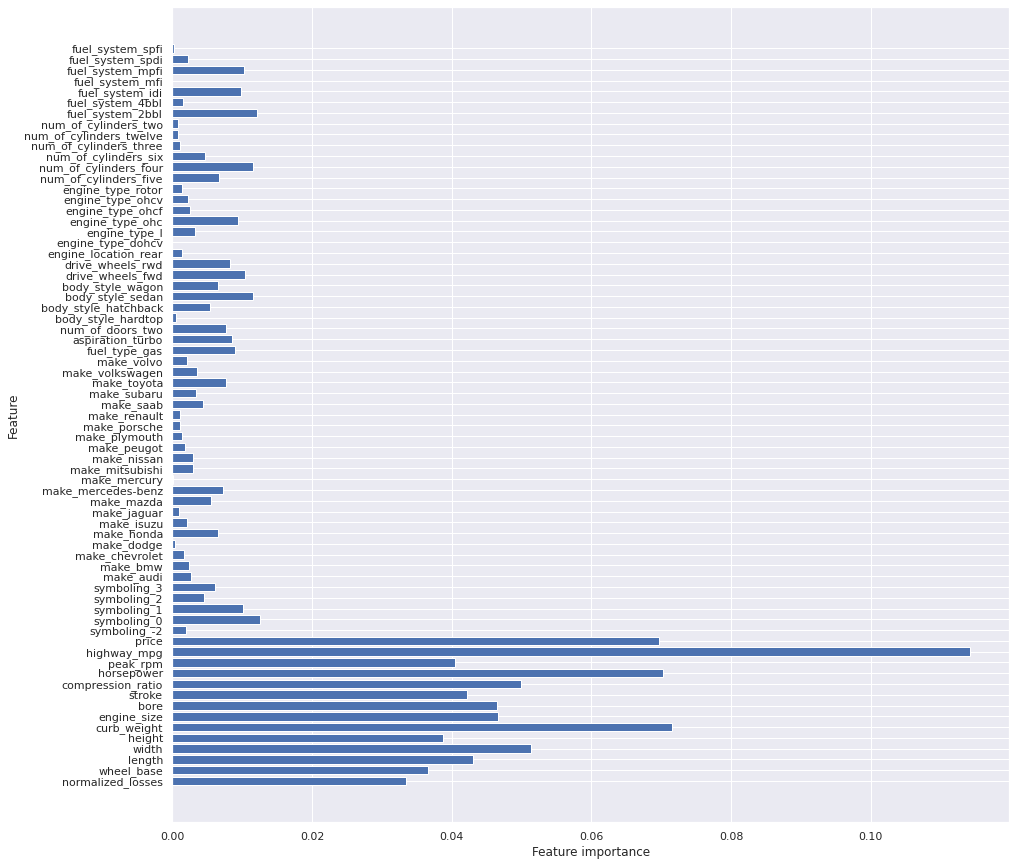

In [47]:
rfecv_features = []

for bool, feature in zip(rfecv_mask, x_train.columns):
  if bool:
    rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)

n_features = x_train.shape[1]
plt.figure(figsize=(15,15))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), x_train.columns.values)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

Our cross validation determined that there are 11 ideal features to use in our model:

1. length
2. width
3. curb_weight
4. engine_size
5. bore
6. stroke
7. compression_ratio
8. horsepower
9. peak_rpm
10. highway_mpg
11. price

## Variance Inflation Factor

Next, we'll use variance inflation factor (VIF) to detect multicollinearity. A VIF over 10 is cause for concern, and it usually means the variable has multicollinearity and should be removed from the model.

We're first going to fit a model with all 11 of our features from the RFE, eliminate any multicollinear features, fit a new model with our new features, and repeat the process until we have a model without any multicollinear features

In [48]:
x_train_vif = x_train[['length', 'width', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']]

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# check all 11 features
car_data_vif = sm.add_constant(x_train_vif)

# For each X, calculate VIF and save in dataframe
vif_df = pd.DataFrame()
vif_df["VIF Factor"] = [variance_inflation_factor(car_data_vif.values, i) for i in range(car_data_vif.shape[1])]
vif_df["features"] = car_data_vif.columns
vif_df.round(1)

,VIF Factor,features
0,1.0,const
1,6.3,length
2,6.9,width
3,15.5,curb_weight
4,8.8,engine_size
5,2.1,bore
6,1.2,stroke
7,2.2,compression_ratio
8,7.0,horsepower
9,2.4,peak_rpm


As you can see, curb_weight has a VIF Factor of 15.5. This indicates a high level of collinearity. Referring to our table above, we can see that curb_weight has a high correlation to length, weight, engine_size, highway_mpg, and price. All those features are already in our model so we can, and should, remove curb_weight. 

Now, we'll re-run the VIF without curb_weight

In [50]:
x_train_vif_mod = x_train[['length', 'width', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']]

In [51]:
# check 10 remaining features
car_data_vif_mod = sm.add_constant(x_train_vif_mod)

# For each X, calculate VIF and save in dataframe
vif_df2 = pd.DataFrame()
vif_df2["VIF Factor"] = [variance_inflation_factor(car_data_vif_mod.values, i) for i in range(car_data_vif_mod.shape[1])]
vif_df2["features"] = car_data_vif_mod.columns
vif_df2.round(1)

,VIF Factor,features
0,1.0,const
1,5.2,length
2,6.5,width
3,8.6,engine_size
4,2.1,bore
5,1.1,stroke
6,2.0,compression_ratio
7,6.6,horsepower
8,2.3,peak_rpm
9,4.8,highway_mpg


We now don't have any features above 10, but engine_size at 8.6 is still concerning. Looking at our correlation table, we can see that engine_size is strongly correlated to  horsepower and price, both of which are already included in our model. Therefore, we'll remove engine_size from our model

Let's try again without engine_size

In [52]:
x_train_vif_final = x_train[['length', 'width', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']]

In [53]:
# check 9 remaining features
car_data_vif_final = sm.add_constant(x_train_vif_final)

# For each X, calculate VIF and save in dataframe
vif_df3 = pd.DataFrame()
vif_df3["VIF Factor"] = [variance_inflation_factor(car_data_vif_final.values, i) for i in range(car_data_vif_final.shape[1])]
vif_df3["features"] = car_data_vif_final.columns
vif_df3.round(1)

,VIF Factor,features
0,1.0,const
1,5.2,length
2,6.4,width
3,2.1,bore
4,1.1,stroke
5,1.9,compression_ratio
6,5.0,horsepower
7,1.7,peak_rpm
8,4.6,highway_mpg
9,4.9,price


It looks like we've removed all features with collinearity as our highest VIF Factor is width with 6.4. Thus, we'll use the following 9 features in our model:

1. length
2. width
3. bore
4. stroke
5. compression_ratio
6. horsepower
7. peak_rpm
8. highway_mpg
9. price

## Setting final data set

Now, we'll finalize our data set by setting it to include all the variables we found to be important via our VIF analysis

In [54]:
# set final columns
final_columns = ['length', 'width', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price']

# set training and test data
x_train_final = x_train[final_columns]
x_test_final = x_test[final_columns]

# trim data frame to only include our chosen features
car_data_final = car_data_with_dummies[['length', 'width', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price', 'city_mpg']]

# check the results
print('Training dataset shape:', x_train_final.shape, y_train.shape)
print('Testing dataset shape:', x_test_final.shape, y_test.shape)
print('Full dataset shape:', car_data_final.shape)

Training dataset shape: (143, 9) (143, 1)
Testing dataset shape: (62, 9) (62, 1)
Full dataset shape: (205, 10)


We only need to re-set the independant variables for our training and testing datasets since nothing changed regarding our dependant variable, we just trimmed down the features included in our independant variables.

We now have 9 independant columns (enumerated above), 143 training observations, and 62 testing observations. This leaves us with a full dataset that is 205 rows by 10 columns


# __6) Build Model__

We now have enough information to start building our model. We'll take the information we gathered from our EDA and Feature Selection to build multiple linear regression models, evaluate them, make the necessary changes, compare the results, and choose the best model.

## Model 0:

We'll build our first model using all 9 features we isolated in our feature selection process. We'll then evaluate our model using a 10-fold cross validation and other key metrics to determine what changes, if any, to make.

### Build

We'll start by building a model using sklearn's `LinearRegression` model

In [55]:
# build first model
model0 = LinearRegression()

# perform cross validation to evaluate model
scores0 = cross_val_score(model0, x_train_final, y_train, cv=10)

print(scores0)

print('Mean Accuracy:', np.mean(scores0))

[0.958897   0.8514965  0.93156742 0.95824128 0.95252493 0.94917441
 0.95222477 0.94183242 0.95479509 0.92693813]
Mean Accuracy: 0.9377691961783716


### Evaluate

We'll now use statsmodel's `OLS` function to get the summary statistics for our model

In [56]:
# add constant to make usable in OLS
df_with_const = sm.add_constant(x_train_final)

# fit model
result = sm.OLS(y_train, df_with_const).fit()

# print summary stats
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     338.1
Date:                Tue, 18 May 2021   Prob (F-statistic):           4.59e-87
Time:                        06:52:38   Log-Likelihood:                -247.78
No. Observations:                 143   AIC:                             515.6
Df Residuals:                     133   BIC:                             545.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.1469      0.11

__Takeaways:__

- statsmodel gives us an $R^2$ of 0.958 compared to 0.938 we got above using the sklearn linear regression model.
- There are quite a few variables with a p-value greater than 0.05, indicating they don't effect our dependant variable and can be removed from our model

<center><b><u>Features to remove</u></b></center>

| Feature | P-value |
| ------- | ------- |
| width   |   0.058  |
| bore   |   0.266  |
| stroke   |   0.452  |
| peak_rpm   |   0.110  |
| price   |   0.660  |

- That leaves us with 4 variables: length, compression_ratio, horsepower, and highway_mpg

## Model1

We'll now build a model using our remaining 4 features, evaluate that model, and determine if we need to continue the process

### Build

Again, we'll build our model using sklearn's `LinearRegression`

In [57]:
# change independant variables
x_train1 = x_train_final[['length', 'compression_ratio', 'horsepower', 'highway_mpg']]
x_test2 = x_test_final[['length', 'compression_ratio', 'horsepower', 'highway_mpg']]

# build model1
model1 = LinearRegression()

# fit model with 10-fold cross validation
scores1 = cross_val_score(model1, x_train1, y_train, cv=10)

# get scores
print(scores1)
print('Mean Accuracy:', np.mean(scores1))

[0.96489407 0.83806237 0.93902166 0.95377919 0.95727965 0.95665141
 0.94948687 0.94083708 0.95262737 0.93134776]
Mean Accuracy: 0.9383987440383654


### Evaluate

Again, we'll use statsmodel's `OLS` to evaluate our model

In [58]:
# set constant
df_with_const1 = sm.add_constant(x_train1)

# fit model
result1 = sm.OLS(y_train, df_with_const1).fit()

# get summary stats
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     733.9
Date:                Tue, 18 May 2021   Prob (F-statistic):           6.77e-92
Time:                        06:52:38   Log-Likelihood:                -252.76
No. Observations:                 143   AIC:                             515.5
Df Residuals:                     138   BIC:                             530.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.1469      0.12

__Takeaways:__

- We now get a 0.955 $R^2$ with statsmodel and 0.938 with sklearn, but our variables are performing much better with only one displaying a p-value greater than 0.05.
- length has a p-value of 0.472 so we're going to drop that a re-fit the model

## Model2

Once again, we'll fit a new model with our new variables: compression_ratio, horsepower, and highway_mpg. We'll then evaluate the performance of the model and determine what to do.

In [59]:
# re-set independant variables
x_train2 = x_train_final[['compression_ratio', 'horsepower', 'highway_mpg']]
x_test2 = x_test_final[['compression_ratio', 'horsepower', 'highway_mpg']]

# build model2
model2 = LinearRegression()

# fit model with 10-fold cv
scores2 = cross_val_score(model2, x_train2, y_train, cv=10)

# get scores
print(scores2)
print('Mean Accuracy:', np.mean(scores2))

[0.96422791 0.84348291 0.93831563 0.95463831 0.96466958 0.95706502
 0.95010787 0.9497367  0.95280863 0.93013915]
Mean Accuracy: 0.9405191707889113


In [60]:
# add constant to df
df_with_const2 = sm.add_constant(x_train2)

# fit OLS model
result2 = sm.OLS(y_train, df_with_const2).fit()

# get summary stats
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     981.7
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.57e-93
Time:                        06:52:38   Log-Likelihood:                -253.03
No. Observations:                 143   AIC:                             514.1
Df Residuals:                     139   BIC:                             525.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.1469      0.12

__Takeaways:__

- We now have a $R^2$ of 0.955 and 0.941 with statsmodel and sklearn respectively
- We also have no variables with a p-value over 0.05
- It looks like all our variables contribute to the independant variable

## Choose Model

Let's now take a look at all 3 of our models and compare them to choose the most effective and efficient model to predict city_mpg

### $R^2$ scores

Let's first compare the $R^2$ scores of each model.

__sklearn $R^2$__

Here's the results of our sklearn model's 10-fold cross validation

In [61]:
print('model0-cross validated accuracy:',np.mean(scores0)*100, '%')
print('model1-cross validated accuracy:',np.mean(scores1)*100, '%')
print('model2-cross validated accuracy:',np.mean(scores2)*100, '%')

model0-cross validated accuracy: 93.77691961783717 %
model1-cross validated accuracy: 93.83987440383655 %
model2-cross validated accuracy: 94.05191707889114 %


It looks like they're all around the same range, with model2 being slightly above the others, but not enough to set it apart

__statsmodel adjsuted $R^2$__

Here's the results from our statsmodel OLS adjusted $R^2$

In [62]:
print("model0 - rsquared_adj: ",result.rsquared_adj)
print("model1 - rsquared_adj: ",result1.rsquared_adj)
print("model2 - rsquared_adj: ",result2.rsquared_adj)

model0 - rsquared_adj:  0.9552901677121384
model1 - rsquared_adj:  0.9537980982432576
model2 - rsquared_adj:  0.9539577928055712


Again, all 3 models remain around 0.95, with model0 slightly ahead with 0.955. Again, this is not enough separation to set any model apart from the others

It looks like removing all our features with a p-value greater than 0.05 didn't have a material effect on the performance of our model. This tells us that they were essentially inconsequential in predicting our dependant variable. 

Thus, we will choose model2 as our most effective model. It uses the least amount of variables and has the same level of performance as the other 2.

## Test Model

Let's run our test data on our model and see how accurate our predictions are

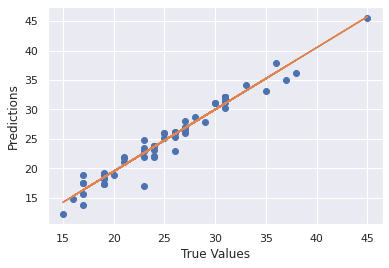

In [63]:
from numpy.polynomial.polynomial import polyfit

# fit model
model2.fit(x_train2, y_train)

# predict
y_pred = model2.predict(x_test2)

# graph results
plt.plot(y_test, y_pred, 'o')

# graph regression line
b, m = polyfit(y_test['city_mpg'], y_pred, 1)
plt.plot(y_test, m*y_test['city_mpg']+b)

plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.show()

As you can see, the regression line stays pretty close to 45 degree line. This indicates a very good fit, as it shows that our predictions for city_mpg remain very close to the actual value of the car's city_mpg

In [64]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     981.7
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.57e-93
Time:                        06:54:48   Log-Likelihood:                -253.03
No. Observations:                 143   AIC:                             514.1
Df Residuals:                     139   BIC:                             525.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.1469      0.12

## Final Model Formula

Given the accuracy and efficiency of model2, we're going to choose this as our model to predict city_mpg. Here's the formula that model:

$y = \beta_0 + \beta_1 \times compression\_ratio + \beta_2 \times horsepower + \beta_3 \times highway\_mpg$

$city\_mpg = 25.1469 + 0.4959 \times compression\_ratio - 0.7241 \times horsepower + 5.8177 \times highway\_mpg$

# 7) Conclusion

We started off with a question, "Given 25 independant variables, 14 numeric and 11 categorical, what variables most accurately predict a car's city_mpg?" 

We performed an exploratry data analysis to learn more about our data and discover any incosistent or missing data. We discovered that there was a significant amount of missing data, represented by a "?". We also learned that most of the numeric variables had a relatively normal distribution and few, if any, outliers. We also determined that the outliers that did exist were likely valid data.

We then moved on to the data preparation portion of the analysis. This entailed imputing data in place of our null values. Our categorical data only had 2 observations with null data so we simply found the most common value of all observations that had similar features to those two observations and imputed that value into those rows.

We then looked at our correlation metrics to see if we can spot any potential highly correlatory features that could be useful in a regression model. We also looked for collinearity amongst independant variables. 

In the next section, we performed some feature engineering using techniques like recursive feature elimination and variance inflation factor to determine the best features to include in our model. This netted us a total of 9 variables that were highly predictive of city_mpg.

With this information, we started building our model using those 9 variables. We discovered that there were 5 variables in our first model that had a p-value exceeding 0.05 so we removed those variables and tried again. Our next iteration netted one variable with a p-value higher than 0.05, so removed that and built our final model, which included compression_ratio, horsepower, and highway_mpg. This model gave us a $R^2$ of 0.955 and a regression line that maintained a 45 degree line when tested with our test data.

We chose the final model since it maintained a high level of predictability while using fewer variables than the other models.

Through our analysis, we found that there are 3 features that are highly predictive of a car's city_mpg. Of the 3, compression_ratio and highway_mpg are positively correlated. This means that as those variables increase, city_mpg increases.

In other words, the more the fuel mixture is compressed before ignition, the more fuel efficient the car will be on city roads. Similarly, the more fuel efficient the vehicle is on the highway, the more fuel efficient it will tend to be in the city.

Horsepower, on the other, is negatively correlated with city_mpg. This means that the more powerful the car is, the less fuel efficient it will be. This make sense, as it stands to reason that a more powerful vehicle would require more fuel to generate that power every mile.